# Tutorial 1 - Google Colab

Google Colaboratory is a platform provided by Google, which provides a Jupyter Notebook interface and is free to use—it even provides free access to GPU resources. Hopefully you are already familiar with Jupyter Notebooks, but if not, here is a quick refresher.

There are two types of cells in a notebook. The cell you are reading now is called a text cell—go ahead a double click it, and take a look at the markdown formatting. Click off the cell to display the formatted text. Google Colab has useful shortcuts for formatting text at the top of the cell when in edit mode. You can make:

**bold text**

*italicised text*



```
# Text formatted as code
```

[link text](https://www.google.co.uk)



> Indented blocks\
Second line


1.   Lists 1
2. List 2

*   Bulleted Lists

And more. Try it out in the next Text cell.


# **Exercise 1**
Write and format some text below! Double click me to edit!

The other type of cell is called a Code cell, and in Colab these cells run **python**. Colab includes all the popular python modules you'll need for this module, as well as some specialist [data science and machine learning](https://) tools. If the module you need isn't available, the tutorial notebooks will provide the code needed to install them.

# **Execise 2**
To run a cell, you can either hit the play button that appears on the left when you are editted the cell, or hit ```shift+enter``` on your keyboard. Try it with the code below:

In [ ]:
import numpy as np

x = np.arange(0,12)
y = np.arange(12,24)

print(x)
print(y)

np.mean(x*y)


[ 0  1  2  3  4  5  6  7  8  9 10 11]
[12 13 14 15 16 17 18 19 20 21 22 23]


108.16666666666667

In the tutorials, there will be a mix of excercises that require you to write code from scratch or finish incomplete code. These will be marked as

```
### Description of task and instructions on how to complete it
# you may also be provided with methods and functions to use as hints
# plt.subplots, axis.scatter, datasets.make_blobs
"""
Code in double quotes is incomplete, your task is to finish it
"""
```

# **Exercise 3**
Follow the instructions below and make a plot.

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)
print(X.shape)
print(y.shape)
print(X)
print(y)

(10, 2)
(10,)
[[ 6.09107518 -0.04336544]
 [ 4.0267346   3.38872211]
 [ 6.70378071  1.04624348]
 [ 9.76826573  4.07297168]
 [ 8.30836734  1.57631489]
 [ 2.97322405  4.52571941]
 [ 9.02873458  3.5999963 ]
 [ 8.9258454   3.64955796]
 [ 7.86526222  4.01987104]
 [ 2.51331181  2.6057231 ]]
[1 2 1 0 1 2 0 0 0 2]


In [ ]:
# Module imports will usually be provided, but feel free to use different ones if you like
import sklearn.datasets as datasets
import matplotlib.pyplot as plt


"""
### Here's a function that takes in a 2D blob of data and plots it on a pyplot
### axis. You should use a scatter plot, and use the labels for the colours.
### Fill in the blanks, then remove the double quotes.
def plot_blobs(blobs, labels, axis):
    # blob: np.array with shape (n_samples, n_features)
    # labels: the integer labels for cluster membership of each sample
    # axis: a pyplot axis object

    axis.scatter(FILL IN)

"""

def plot_blobs(blobs, labels, axis):
    # blobs: np.array with shape (n_samples, n_features)
    # labels: the integer labels for cluster membership of each sample
    # axis: a pyplot axis object

    axis.scatter(x=blobs[:,0], y=blobs[:,1], c=labels)


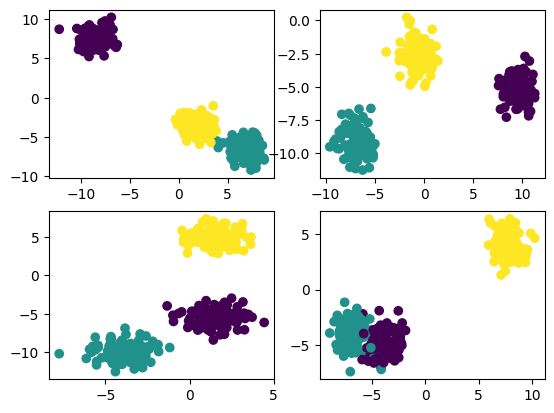

In [ ]:
### Create a matplotlib figure with 4 subplots in a (2,2) configuration
# plt.subplots

fig, axs = plt.subplots(2, 2)


### Create a for loop that does the following for each subplot:
### Create a blob dataset with datasets.make_blobs with 300 samples and
### 3 centres.
### Call the plot_blobs function for the dataset
# datasets.make_blobs
# Think about the shape of your subplots and how to loop over them

for i in range(2):
  for j in range(2):
    X, y = datasets.make_blobs(n_samples=300, centers=3, n_features=2)
    plot_blobs(X, y, axs[i, j])

plt.savefig("exercise3.png")

You'll notice that matplotlib figures are displayed under the code blocks that generate them. to save your figures, you can either ```right-click``` and hit save to save them on your machine, or use the pyplot.savefig method to save them in the notebook storage.

On that subject, on the left side of the screen, you'll see a little folder icon, go ahead and click it. If you need to upload any datasets, such as those given in the tutorials, you can do so in this panel. You should also have a ```sample_data``` folder, click it to open it and you should find a few csv files.

# **Exercise 4**
Use the function below to load in the mnist_train_small.csv dataset.

In [ ]:
import csv
import numpy as np

def load_data(filepath, delimiter=",", dtype=float):
    """Load a numerical numpy array from a file."""

    print(f"Loading {filepath}...")
    with open(filepath, "r") as f:
        data_iterator = csv.reader(f, delimiter=delimiter)
        data_list = list(data_iterator)
    data = np.asarray(data_list, dtype=dtype)
    print("Done.")
    return data

### Call the above function

file_path = "sample_data/mnist_train_small.csv"
Data = load_data(file_path)

print(Data)


Loading sample_data/mnist_train_small.csv...
Done.
[[6. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


The [MNIST Database](https://en.wikipedia.org/wiki/MNIST_database) is a widely used dataset of hand drawn images, used throughout the data science and machine learning community to test models and algorithms.

The data you loaded should have the shape ```(20000, 785)```. The first value in each row is a number between 0 and 9, denoting the class of each sample. The rest of the row is a ```(28,28)``` pixel image, flattened into a ```(784)``` element vector.

Separate out the the labels and images, and change the shape of the images so that they are ```(20000, 28, 28)```. Plot the first image to see if it looks right.

In [ ]:
### Separate out the labels and images
print(Data.shape)
labels = Data[:,0]
images = Data[:, 1:]

(20000, 785)


In [ ]:
### Reshape the images into (20000, 28, 28) format
# np.reshape
print(images.shape)
images = np.reshape(images, (20000, 28, 28))
print(images.shape)

(20000, 784)
(20000, 28, 28)


Text(0.5, 1.0, 'labels[point]')

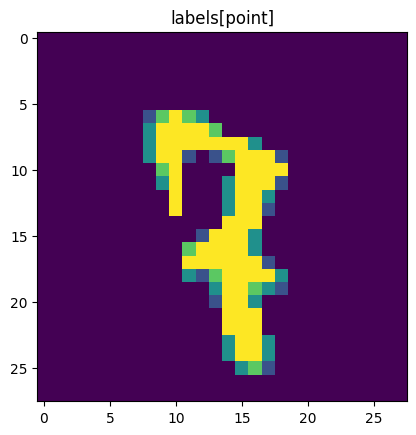

In [ ]:
### Plot one of the images with it's label as a title
# plt.imshow, plt.title

point = 100

plt.imshow(images[point,:,:])
plt.title(f"labels[point]")


# Advanced Features - Completions, Magic Functions and runtimes

Here you will learn some of the useful advanced functions of Colab.

# **Exercise 5**
Completions may be something you have come across in your coding experience, and are often available in your usual editor, in Ipython, and in other Jupyter Notebook platforms. You can use completions by hitting ```<Tab>``` when you are editting some code to complete what you are typing. these work with variables you have created, and with modules, functions and methods. Try it below

In [ ]:
### Type out the first few letters of one of the variables use created above,
### then wait for a little window to open. Find the variable name and hit <Tab>.

### You can do the same with modules, functions, classes, etc. Type np. and then
### wait for the window, here you can scroll through all the functions in numpy.
### The window will update as you continue typing.

### Finally, when you type out a function and call it with (), a window will
### open showing the documentation for that function, and the arguments it takes
### Try this with np.mean


# **Exercise 6**
Magics are a special class of functions that you can use in Ipython and Jupyter notebooks. Magics aren't python code, but they add an extra layer of functionality to the editor and intepreter. Invoke a magic with the ```%``` symbol. Use the ```%magic``` command below to view the full tutorial on magics.

In [ ]:
%magic

A handful of useful magics when working inside a jupyter notebook are:

- `%%writefile` - writes the entire cell to a file
- `%save` - evaluates current line and writes its output to a file
- `%history` - prints the IPython command history (including magics)
- `%xmode` - defines how exceptions are displayed (see exercises that follow)
- `%timeit` - times a single line (or entire cell with `%%timeit`) of code
- `%pdb` - the Python DeBugger (when enabled, will start automatically on exceptions)
- `%prun` - profiles a function call in a line

The [full list][magics] of magics in IPython is quite long,
although most magics are not overly useful when working within
a jupyter notebook.

[magics]: http://ipython.readthedocs.io/en/stable/interactive/magics.html

Use the ```%timeit``` function to time ```np.matmul(x, y)```

*NOTE x and y should still be defined from the first cell you ran in this notebook.*

In [ ]:
### TODO
# Time the function np.matmul using %timeit
%timeit np.matmaul(x, y)

# **Exercise 7**
When you start up a notebook in Colab, you will be allocated a number of compuattional resources to run your code with. This is called your ```runtime```. In the top right, you should see a small box that shows your current RAM and Disk usage. Go ahead and click on that.

You'll see a panel that shows a simple display of your memory usage overtime, and what type of ```runtime``` you are using. If you haven't changed anything, it should say something like ```Python 3 Google Compute Engine backend```.

Later in the course you will see how you can use GPUs to accelerate the speed of your code. Google provides free access to GPUs—with some limitations—with colab. To change your notebook over to a GPU, click ```Change runtime type``` at the bottom of the Resources tab and change ```Hardware Accelerator``` to GPU. It will take a few seconds to connect, but the tab should now say ```Python 3 Google Compute Engine backend (GPU)```.

There are a few different models of GPUs that are available, and it can be a bit of a lucky dip for what you will be allocated. run the command ```nvidia-smi -L``` below to see what GPU you have been allocated.

*NOTE Changing the runtime type resets the notebook, so any files you have uploaded and any variables you have generated will be deleted. If you change the runtime type mid session, you will have to rerun your code from the start in order for everything to work.*

*Don't worry too much about the details of GPUs just yet, that will be covered later in the course.*

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-638f67be-c996-fc80-7f62-d82b025fcc86)


# **Exercise 8**
For assignments, you will need to submit both the completed assignment notebook, and a sharing link to the notebook on your google drive. To download the notebook, you can click File in the top left, then save, followed by Download > Download .ipynb. Try this now.

To create a sharing link, click the Share button in the top right, change the "General Access" to "Anyone with the link", then click "Copy Link". You can then paste this link into the text entry provided in the assignment, or add it as a comment to your submission. Sharing the link helps the module team ensure proper authorship of your code.